In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow import keras

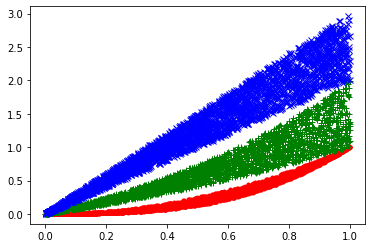

In [ ]:
n=1000 #ค่าเริ่มต้น

X = np.array([1,2,3, 4,5,6]) #3 คู่
#X = np.array([1,2,3,4, 5,6,7,8]) #4 คู่
#X = np.array([1,2,3,4,5, 6,7,8,9,10]) #5 คู่ #ค่าเริ่มต้น
#X = np.array([1,2,3,4,5,6, 7,8,9,10,11,12]) #6 คู่
#X = np.array([1,2,3,4,5,6,7 ,8,9,10,11,12,13,14]) #7 คู่

Y = np.array([1,2,3])
dimx = int(X.size/2) 
for idx in range(n):
  idx = np.random.rand(dimx)
  idy = idx**(2+float(np.random.rand(1)))
  newx = np.concatenate([idx, idy])
  X = np.vstack([X,newx])
  Y = np.vstack([Y,[1,0,0]])
for idx in range(n):
  idx = np.random.rand(dimx)
  idy = (2+float(np.random.rand(1)))**idx-1
  newx = np.concatenate([idx, idy])
  X = np.vstack([X,newx])
  Y = np.vstack([Y,[0,1,0]])
for idx in range(n):
  idx = np.random.rand(dimx)
  idy = idx*(2+float(np.random.rand(1)))
  newx = np.concatenate([idx, idy])
  X = np.vstack([X,newx])
  Y = np.vstack([Y,[0,0,1]])
X=np.delete(X,0,0)
Y=np.delete(Y,0,0)
#print(X)
#print(Y)

plt.plot(X[:n,:dimx],X[:n,dimx:],'.r')
plt.plot(X[n:2*n,:dimx],X[n:2*n,dimx:],'+g')
plt.plot(X[2*n:,:dimx],X[2*n:,dimx:],'xb')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(900.0/2400.0), random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(f'#traning = {X_train.shape[0]}')
print(f'#validation = {X_val.shape[0]}')
print(f'#test = {X_test.shape[0]}')
X_train.shape[0:]

#traning = 1920
#validation = 480
#test = 600


(1920, 6)

In [ ]:
# sequential model
def get_SequentialModel(learning_rate = 0.01):
    model = keras.models.Sequential()

    #hidden layer
    model.add(keras.layers.Dense(100,activation='relu'))
    #model.add(keras.layers.Dense(100,activation='relu'))
    #model.add(keras.layers.Dense(100,activation='relu'))
    #model.add(keras.layers.Dense(100,activation='relu'))
    #model.add(keras.layers.Dense(100,activation='relu'))

    #output layer
    model.add(keras.layers.Dense(3,activation='relu'))

    model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

model = get_SequentialModel()


In [ ]:
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_val,y_val))

Epoch 1/500
60/60 [==============================] - 0s 3ms/step - loss: 0.2612 - val_loss: 0.2184
Epoch 2/500
60/60 [==============================] - 0s 1ms/step - loss: 0.2013 - val_loss: 0.1885
Epoch 3/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1761 - val_loss: 0.1698
Epoch 4/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1598 - val_loss: 0.1565
Epoch 5/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1483 - val_loss: 0.1478
Epoch 6/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1400 - val_loss: 0.1406
Epoch 7/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1336 - val_loss: 0.1350
Epoch 8/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1285 - val_loss: 0.1306
Epoch 9/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1243 - val_loss: 0.1267
Epoch 10/500
60/60 [==============================] - 0s 1ms/step - loss: 0.1206 - val_loss: 0.1232
Epoch 11/

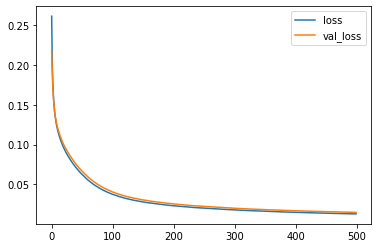

In [ ]:
pd.DataFrame(history.history).plot();

root mean square error is 0.19096204164003816


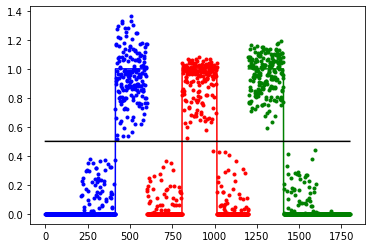

In [ ]:
Z = model.predict(X_test)
lossplot = pd.DataFrame(np.hstack([y_test,Z]))
sortlossplot = lossplot.sort_values(by=[0,1])
losslength = sortlossplot.shape[0]
plt.plot(range(losslength),sortlossplot[:][0],'-b',
         range(losslength,2*losslength),sortlossplot[:][1],'-r',
         range(2*losslength,3*losslength),sortlossplot[:][2],'-g',
         range(losslength),sortlossplot[:][3],'.b',
         range(losslength,2*losslength),sortlossplot[:][4],'.r',
         range(2*losslength,3*losslength),sortlossplot[:][5],'.g',
         range(3*losslength),np.ones(3*losslength)*0.5,'-k',)
#print(sortlossplot.tail(10))
rms = np.sqrt(np.sum((y_test-Z)**2/len(Z)))
print(f'root mean square error is {rms}')

In [ ]:
idmx = sortlossplot.iloc[:,0:3].idxmax(axis=1)
idmz = sortlossplot.iloc[:,3:6].idxmax(axis=1)-3
comp = list(idmx==idmz)
print(f'Prediction are correct {comp.count(True)} of {comp.count(True)+comp.count(False)} \
total test sample\naccuracy is {comp.count(True)/(comp.count(True)+comp.count(False))*100}%')



Prediction are correct 599 of 600 total test sample
accuracy is 99.83333333333333%
